#**Target Store Data Analysis**


--------------------------------

[Data Scource : Kaggle](https://www.kaggle.com/ben1989/target-store-dataset)



Data is cleaned and prepared. 

Store location visualization

Exploratory Data Analysis

Clustering (DBSCAN)


---------------------------------


In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16, 12]
import sklearn

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
target = pd.read_csv("drive/My Drive/Colab Notebooks/Target/target.csv", encoding='ISO-8859-1')

##**Data Cleaning**

In [ ]:
target.head()

,X.locale,Address.AddressLine1,Address.AddressLine2,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,Address.PostalCode,Address.Subdivision,AlternateIdentifier.ID,ID,IsDaylightSavingsTimeRecognized,LocationMilestones.LastRemodelDate,LocationMilestones.OpenDate,Market,Name,OperatingHours..timeFormat,Store.StoreDistrictID,Store.StoreGroupID,Store.StoreRegionID,SubTypeDescription,TimeZone.TimeZoneCode,TimeZone.TimeZoneDescription,TimeZone.TimeZoneOffset.OffsetCode,TimeZone.TimeZoneOffset.OffsetHours,TypeCode,PhoneNumber,FaxNumber,BeginTime.MF,Is24Hours.MF,IsOpen.MF,Summary.MF,ThruTime.MF,BeginTime.Sat,Is24Hours.Sat,IsOpen.Sat,Summary.Sat,ThruTime.Sat,BeginTime.Sun,Is24Hours.Sun,IsOpen.Sun,Summary.Sun,ThruTime.Sun,AllCapability
0,en-US,400 Oxford Exchange Blvd,NaN,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,36203-3459,AL,T2153,2153,True,NaN,2006-07-19T12:00:00,ESE,Oxford,12-hour,340,394,300,NaN,CST,Central Std Time,UTC,-6,STR,(256) 231-2900,(256) 231-2910,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star..."
1,en-US,2640 Enterprise Dr,NaN,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,36801-1511,AL,T1499,1499,True,NaN,2005-07-20T12:00:00,ESE,Opelika,12-hour,340,394,300,NaN,CST,Central Std Time,UTC,-6,STR,(334) 705-0152,(334) 363-3235,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
2,en-US,1129 S Park St,NaN,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,30117-4429,GA,T1073,1073,True,NaN,1997-07-23T12:00:00,ESE,Carrollton,12-hour,336,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(770) 838-9221,(678) 664-3234,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN
3,en-US,555 Bullsboro Dr,NaN,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,30265-1045,GA,T1223,1223,True,2013-06-27T12:00:00,1999-10-06T12:00:00,ESE,Newnan,12-hour,336,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(770) 502-0294,(678) 621-6321,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob..."
4,en-US,1591 Bradley Park Dr,NaN,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,31904-3071,GA,T1179,1179,True,2004-10-17T12:00:00,1999-03-03T12:00:00,ESE,Columbus,12-hour,340,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(706) 321-0831,(706) 225-5604,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot..."


In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X.locale                             1829 non-null   object 
 1   Address.AddressLine1                 1829 non-null   object 
 2   Address.AddressLine2                 58 non-null     object 
 3   Address.City                         1829 non-null   object 
 4   Address.CountryName                  1829 non-null   object 
 5   Address.County                       1828 non-null   object 
 6   Address.FormattedAddress             1829 non-null   object 
 7   Address.IntersectionDescription      1828 non-null   object 
 8   Address.Latitude                     1829 non-null   float64
 9   Address.Longitude                    1829 non-null   float64
 10  Address.PostalCode                   1829 non-null   object 
 11  Address.Subdivision           

In [ ]:
target.isna().sum()

X.locale                                  0
Address.AddressLine1                      0
Address.AddressLine2                   1771
Address.City                              0
Address.CountryName                       0
Address.County                            1
Address.FormattedAddress                  0
Address.IntersectionDescription           1
Address.Latitude                          0
Address.Longitude                         0
Address.PostalCode                        0
Address.Subdivision                       0
AlternateIdentifier.ID                    0
ID                                        0
IsDaylightSavingsTimeRecognized           0
LocationMilestones.LastRemodelDate      395
LocationMilestones.OpenDate               0
Market                                   91
Name                                      0
OperatingHours..timeFormat                0
Store.StoreDistrictID                     0
Store.StoreGroupID                        0
Store.StoreRegionID             

In [ ]:
target = target.drop(columns=['Address.AddressLine2'])
target.head()

,X.locale,Address.AddressLine1,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,Address.PostalCode,Address.Subdivision,AlternateIdentifier.ID,ID,IsDaylightSavingsTimeRecognized,LocationMilestones.LastRemodelDate,LocationMilestones.OpenDate,Market,Name,OperatingHours..timeFormat,Store.StoreDistrictID,Store.StoreGroupID,Store.StoreRegionID,SubTypeDescription,TimeZone.TimeZoneCode,TimeZone.TimeZoneDescription,TimeZone.TimeZoneOffset.OffsetCode,TimeZone.TimeZoneOffset.OffsetHours,TypeCode,PhoneNumber,FaxNumber,BeginTime.MF,Is24Hours.MF,IsOpen.MF,Summary.MF,ThruTime.MF,BeginTime.Sat,Is24Hours.Sat,IsOpen.Sat,Summary.Sat,ThruTime.Sat,BeginTime.Sun,Is24Hours.Sun,IsOpen.Sun,Summary.Sun,ThruTime.Sun,AllCapability
0,en-US,400 Oxford Exchange Blvd,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,36203-3459,AL,T2153,2153,True,NaN,2006-07-19T12:00:00,ESE,Oxford,12-hour,340,394,300,NaN,CST,Central Std Time,UTC,-6,STR,(256) 231-2900,(256) 231-2910,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star..."
1,en-US,2640 Enterprise Dr,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,36801-1511,AL,T1499,1499,True,NaN,2005-07-20T12:00:00,ESE,Opelika,12-hour,340,394,300,NaN,CST,Central Std Time,UTC,-6,STR,(334) 705-0152,(334) 363-3235,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
2,en-US,1129 S Park St,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,30117-4429,GA,T1073,1073,True,NaN,1997-07-23T12:00:00,ESE,Carrollton,12-hour,336,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(770) 838-9221,(678) 664-3234,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN
3,en-US,555 Bullsboro Dr,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,30265-1045,GA,T1223,1223,True,2013-06-27T12:00:00,1999-10-06T12:00:00,ESE,Newnan,12-hour,336,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(770) 502-0294,(678) 621-6321,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob..."
4,en-US,1591 Bradley Park Dr,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,31904-3071,GA,T1179,1179,True,2004-10-17T12:00:00,1999-03-03T12:00:00,ESE,Columbus,12-hour,340,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(706) 321-0831,(706) 225-5604,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot..."


In [ ]:
Last_Remodel_Date = pd.to_datetime(target["LocationMilestones.LastRemodelDate"])

In [ ]:
Open_Date = pd.to_datetime(target["LocationMilestones.OpenDate"])

In [ ]:
target["Last_Remodel_Date"] = Last_Remodel_Date

In [ ]:
target["Open_Date"] = Open_Date

In [ ]:
target = target.drop(columns=['LocationMilestones.LastRemodelDate', 'LocationMilestones.OpenDate'])

In [ ]:
target.head()

,X.locale,Address.AddressLine1,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,Address.PostalCode,Address.Subdivision,AlternateIdentifier.ID,ID,IsDaylightSavingsTimeRecognized,Market,Name,OperatingHours..timeFormat,Store.StoreDistrictID,Store.StoreGroupID,Store.StoreRegionID,SubTypeDescription,TimeZone.TimeZoneCode,TimeZone.TimeZoneDescription,TimeZone.TimeZoneOffset.OffsetCode,TimeZone.TimeZoneOffset.OffsetHours,TypeCode,PhoneNumber,FaxNumber,BeginTime.MF,Is24Hours.MF,IsOpen.MF,Summary.MF,ThruTime.MF,BeginTime.Sat,Is24Hours.Sat,IsOpen.Sat,Summary.Sat,ThruTime.Sat,BeginTime.Sun,Is24Hours.Sun,IsOpen.Sun,Summary.Sun,ThruTime.Sun,AllCapability,Last_Remodel_Date,Open_Date
0,en-US,400 Oxford Exchange Blvd,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,36203-3459,AL,T2153,2153,True,ESE,Oxford,12-hour,340,394,300,NaN,CST,Central Std Time,UTC,-6,STR,(256) 231-2900,(256) 231-2910,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star...",NaT,2006-07-19 12:00:00
1,en-US,2640 Enterprise Dr,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,36801-1511,AL,T1499,1499,True,ESE,Opelika,12-hour,340,394,300,NaN,CST,Central Std Time,UTC,-6,STR,(334) 705-0152,(334) 363-3235,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'...",NaT,2005-07-20 12:00:00
2,en-US,1129 S Park St,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,30117-4429,GA,T1073,1073,True,ESE,Carrollton,12-hour,336,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(770) 838-9221,(678) 664-3234,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN,NaT,1997-07-23 12:00:00
3,en-US,555 Bullsboro Dr,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,30265-1045,GA,T1223,1223,True,ESE,Newnan,12-hour,336,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(770) 502-0294,(678) 621-6321,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob...",2013-06-27 12:00:00,1999-10-06 12:00:00
4,en-US,1591 Bradley Park Dr,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,31904-3071,GA,T1179,1179,True,ESE,Columbus,12-hour,340,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(706) 321-0831,(706) 225-5604,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot...",2004-10-17 12:00:00,1999-03-03 12:00:00


In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   X.locale                             1829 non-null   object        
 1   Address.AddressLine1                 1829 non-null   object        
 2   Address.City                         1829 non-null   object        
 3   Address.CountryName                  1829 non-null   object        
 4   Address.County                       1828 non-null   object        
 5   Address.FormattedAddress             1829 non-null   object        
 6   Address.IntersectionDescription      1828 non-null   object        
 7   Address.Latitude                     1829 non-null   float64       
 8   Address.Longitude                    1829 non-null   float64       
 9   Address.PostalCode                   1829 non-null   object        
 10  Address.Subd

In [ ]:
Open_year = pd.DatetimeIndex(target['Open_Date']).year

In [ ]:
Open_year

Int64Index([2006, 2005, 1997, 1999, 1999, 2006, 2003, 1998, 2007, 2000,
            ...
            2001, 1983, 2000, 2006, 2001, 2007, 2008, 2009, 2009, 2007],
           dtype='int64', name='Open_Date', length=1829)

In [ ]:
target["Open_year"] = Open_year
target["Remodel_year"] = pd.DatetimeIndex(target['Last_Remodel_Date']).year

.

In [ ]:
x = pd.to_datetime(target.Open_year, format='%Y')

In [ ]:
target["Open_year"] = x

In [ ]:
y = pd.to_datetime(target.Remodel_year, format='%Y')
target["Remodel_year"] = y

##**Expolratory Data Analysis**

In [ ]:
target["Address.County"].nunique()

528

In [ ]:
df_county_count = target.groupby("Address.County")["X.locale"].count()

In [ ]:
df_county_count.sort_values(ascending=False, inplace = True)

In [ ]:
df_county_count

Address.County
Los Angeles     68
Cook            44
Orange          44
Maricopa        34
Harris          24
                ..
Glynn            1
Riley            1
Roanoke City     1
Geauga           1
Yuma             1
Name: X.locale, Length: 528, dtype: int64

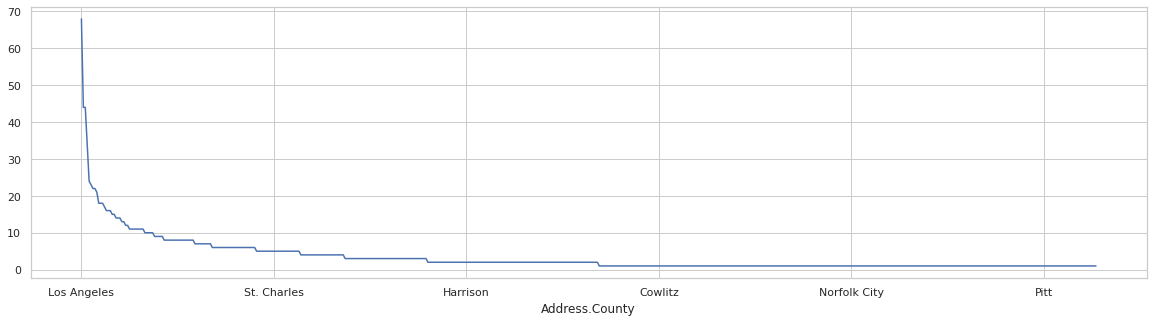

In [ ]:
df_county_count.plot(figsize=(20,5))

**Los Angeles County** has the highest number of Target stores in United States, followed by Cook.



In [ ]:
target["Address.City"].nunique()

1249

In [ ]:
df_city_count = target.groupby("Address.City")["X.locale"].count()

In [ ]:
df_city_count.sort_values(ascending=False, inplace = True)
df_city_count

Address.City
Chicago        19
Houston        15
San Antonio    11
San Jose       11
Phoenix        10
               ..
Oak Park        1
Oak Lawn        1
Oak Creek       1
O Fallon        1
ALLENTOWN       1
Name: X.locale, Length: 1249, dtype: int64

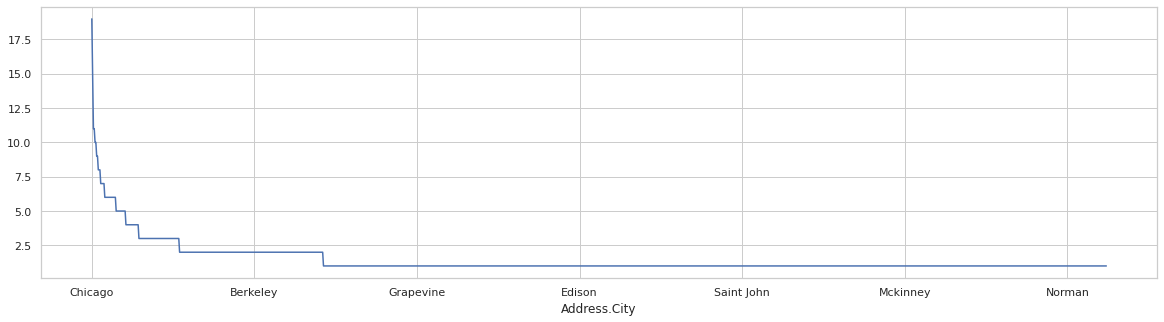

In [ ]:
df_city_count.plot(figsize=(20,5))

**Chicago City** has the largest number of Target stores as compared to other cities.

-----------------------------------------------------------------------------

In [ ]:
df_store_locations = target[["Address.City", "Address.Latitude", "Address.Longitude"]].copy()

In [ ]:
df_store_locations.head()

,Address.City,Address.Latitude,Address.Longitude
0,Oxford,33.608825,-85.783182
1,Opelika,32.618108,-85.410636
2,Carrollton,33.558920,-85.076473
3,Newnan,33.392907,-84.758875
4,Columbus,32.534649,-84.971073


In [ ]:
import folium

In [ ]:
!pip install geocoder

     |████████████████████████████████| 102kB 2.3MB/s 


In [ ]:
import geocoder
from geopy.geocoders import Nominatim

In [ ]:
address = 'United States of America'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of USA are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of USA are 39.7837304, -100.4458825.


In [ ]:
map_loc = folium.Map(location=[latitude, longitude], zoom_start=5)

for lat, lng, city in zip(df_store_locations['Address.Latitude'], df_store_locations['Address.Longitude'], df_store_locations['Address.City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_loc)  


In [ ]:
map_loc

Maximum Store clusters can be seen at either the western part or the eastern part of USA. Smaller clusters are are present in the central parts.

------------------------------------------------------------------------

In [ ]:
target["Address.Subdivision"].nunique()

50

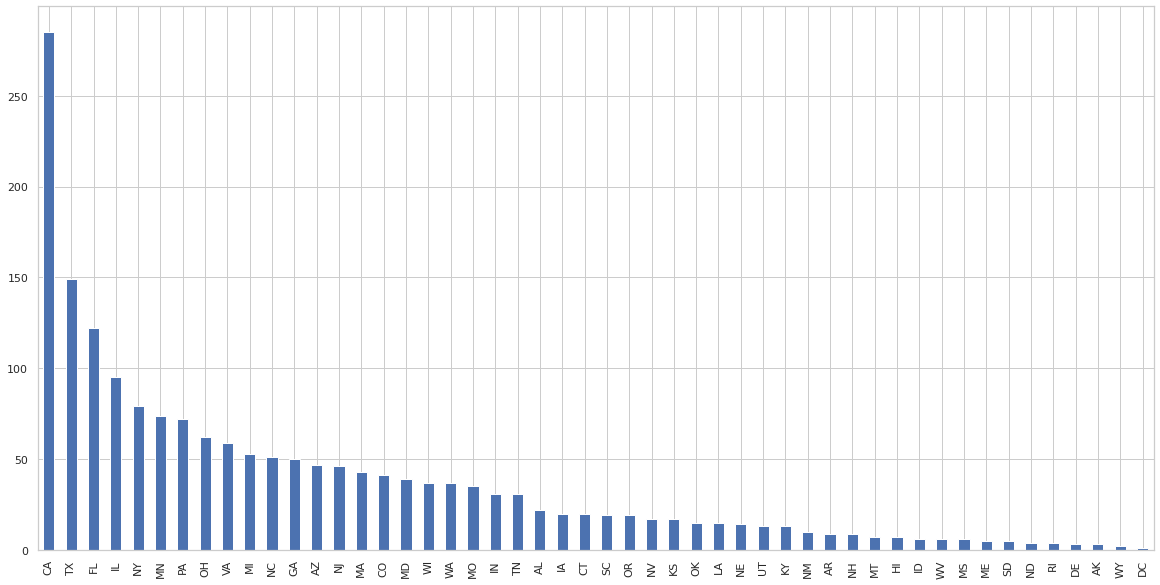

In [ ]:
target['Address.Subdivision'].value_counts().plot(kind="bar",figsize = (20,10))

**Address Subdivision "CA"** has the maximum store records followed by **"TX"**.


---------------------------------------------------------------------------------------

In [ ]:
target.head()

,X.locale,Address.AddressLine1,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,Address.PostalCode,Address.Subdivision,AlternateIdentifier.ID,ID,IsDaylightSavingsTimeRecognized,Market,Name,OperatingHours..timeFormat,Store.StoreDistrictID,Store.StoreGroupID,Store.StoreRegionID,SubTypeDescription,TimeZone.TimeZoneCode,TimeZone.TimeZoneDescription,TimeZone.TimeZoneOffset.OffsetCode,TimeZone.TimeZoneOffset.OffsetHours,TypeCode,PhoneNumber,FaxNumber,BeginTime.MF,Is24Hours.MF,IsOpen.MF,Summary.MF,ThruTime.MF,BeginTime.Sat,Is24Hours.Sat,IsOpen.Sat,Summary.Sat,ThruTime.Sat,BeginTime.Sun,Is24Hours.Sun,IsOpen.Sun,Summary.Sun,ThruTime.Sun,AllCapability,Last_Remodel_Date,Open_Date,Open_year,Remodel_year
0,en-US,400 Oxford Exchange Blvd,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,36203-3459,AL,T2153,2153,True,ESE,Oxford,12-hour,340,394,300,NaN,CST,Central Std Time,UTC,-6,STR,(256) 231-2900,(256) 231-2910,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star...",NaT,2006-07-19 12:00:00,2006-01-01,NaT
1,en-US,2640 Enterprise Dr,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,36801-1511,AL,T1499,1499,True,ESE,Opelika,12-hour,340,394,300,NaN,CST,Central Std Time,UTC,-6,STR,(334) 705-0152,(334) 363-3235,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'...",NaT,2005-07-20 12:00:00,2005-01-01,NaT
2,en-US,1129 S Park St,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,30117-4429,GA,T1073,1073,True,ESE,Carrollton,12-hour,336,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(770) 838-9221,(678) 664-3234,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN,NaT,1997-07-23 12:00:00,1997-01-01,NaT
3,en-US,555 Bullsboro Dr,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,30265-1045,GA,T1223,1223,True,ESE,Newnan,12-hour,336,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(770) 502-0294,(678) 621-6321,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob...",2013-06-27 12:00:00,1999-10-06 12:00:00,1999-01-01,2013-01-01
4,en-US,1591 Bradley Park Dr,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,31904-3071,GA,T1179,1179,True,ESE,Columbus,12-hour,340,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(706) 321-0831,(706) 225-5604,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot...",2004-10-17 12:00:00,1999-03-03 12:00:00,1999-01-01,2004-01-01


Region ID wise clusters

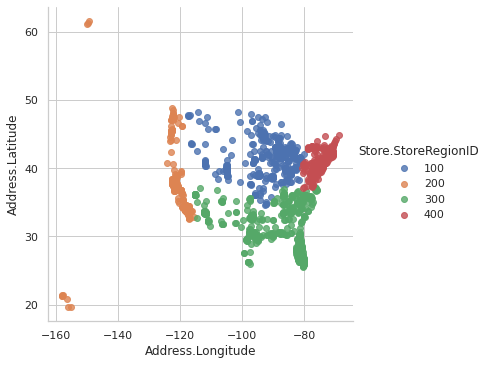

In [ ]:
sns.lmplot(y='Address.Latitude', x='Address.Longitude', hue='Store.StoreRegionID', 
           data=target, 
           fit_reg=False)

--------------------------------------------------------------------

Store Group ID wise clusters

In [ ]:
target['Store.StoreGroupID'].unique()

array([394, 393, 395, 194, 190, 392, 298, 391, 390, 296, 292, 197, 294,
       295, 290, 496, 498, 495, 493, 497, 499, 396, 196, 199, 192, 195])

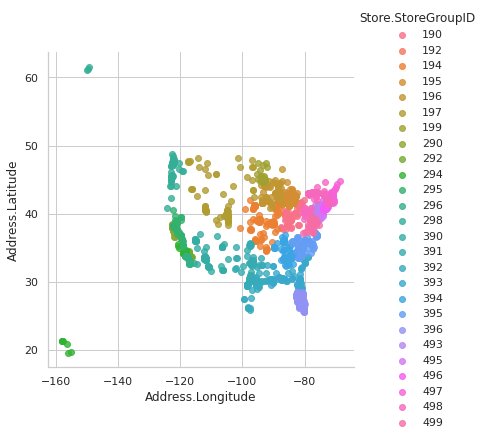

In [ ]:
sns.lmplot(y='Address.Latitude', x='Address.Longitude', hue='Store.StoreGroupID', 
           data=target, 
           fit_reg=False)

------------------------------------------------------------------------

In [ ]:
target.head()

,X.locale,Address.AddressLine1,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,Address.PostalCode,Address.Subdivision,AlternateIdentifier.ID,ID,IsDaylightSavingsTimeRecognized,Market,Name,OperatingHours..timeFormat,Store.StoreDistrictID,Store.StoreGroupID,Store.StoreRegionID,SubTypeDescription,TimeZone.TimeZoneCode,TimeZone.TimeZoneDescription,TimeZone.TimeZoneOffset.OffsetCode,TimeZone.TimeZoneOffset.OffsetHours,TypeCode,PhoneNumber,FaxNumber,BeginTime.MF,Is24Hours.MF,IsOpen.MF,Summary.MF,ThruTime.MF,BeginTime.Sat,Is24Hours.Sat,IsOpen.Sat,Summary.Sat,ThruTime.Sat,BeginTime.Sun,Is24Hours.Sun,IsOpen.Sun,Summary.Sun,ThruTime.Sun,AllCapability,Last_Remodel_Date,Open_Date,Open_year,Remodel_year
0,en-US,400 Oxford Exchange Blvd,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,36203-3459,AL,T2153,2153,True,ESE,Oxford,12-hour,340,394,300,NaN,CST,Central Std Time,UTC,-6,STR,(256) 231-2900,(256) 231-2910,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star...",NaT,2006-07-19 12:00:00,2006-01-01,NaT
1,en-US,2640 Enterprise Dr,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,36801-1511,AL,T1499,1499,True,ESE,Opelika,12-hour,340,394,300,NaN,CST,Central Std Time,UTC,-6,STR,(334) 705-0152,(334) 363-3235,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'...",NaT,2005-07-20 12:00:00,2005-01-01,NaT
2,en-US,1129 S Park St,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,30117-4429,GA,T1073,1073,True,ESE,Carrollton,12-hour,336,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(770) 838-9221,(678) 664-3234,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN,NaT,1997-07-23 12:00:00,1997-01-01,NaT
3,en-US,555 Bullsboro Dr,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,30265-1045,GA,T1223,1223,True,ESE,Newnan,12-hour,336,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(770) 502-0294,(678) 621-6321,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob...",2013-06-27 12:00:00,1999-10-06 12:00:00,1999-01-01,2013-01-01
4,en-US,1591 Bradley Park Dr,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,31904-3071,GA,T1179,1179,True,ESE,Columbus,12-hour,340,394,300,NaN,EST,Eastern Std Time,UTC,-5,STR,(706) 321-0831,(706) 225-5604,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot...",2004-10-17 12:00:00,1999-03-03 12:00:00,1999-01-01,2004-01-01


In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   X.locale                             1829 non-null   object        
 1   Address.AddressLine1                 1829 non-null   object        
 2   Address.City                         1829 non-null   object        
 3   Address.CountryName                  1829 non-null   object        
 4   Address.County                       1828 non-null   object        
 5   Address.FormattedAddress             1829 non-null   object        
 6   Address.IntersectionDescription      1828 non-null   object        
 7   Address.Latitude                     1829 non-null   float64       
 8   Address.Longitude                    1829 non-null   float64       
 9   Address.PostalCode                   1829 non-null   object        
 10  Address.Subd

In [ ]:
df_Open_year = target.Open_year.value_counts()

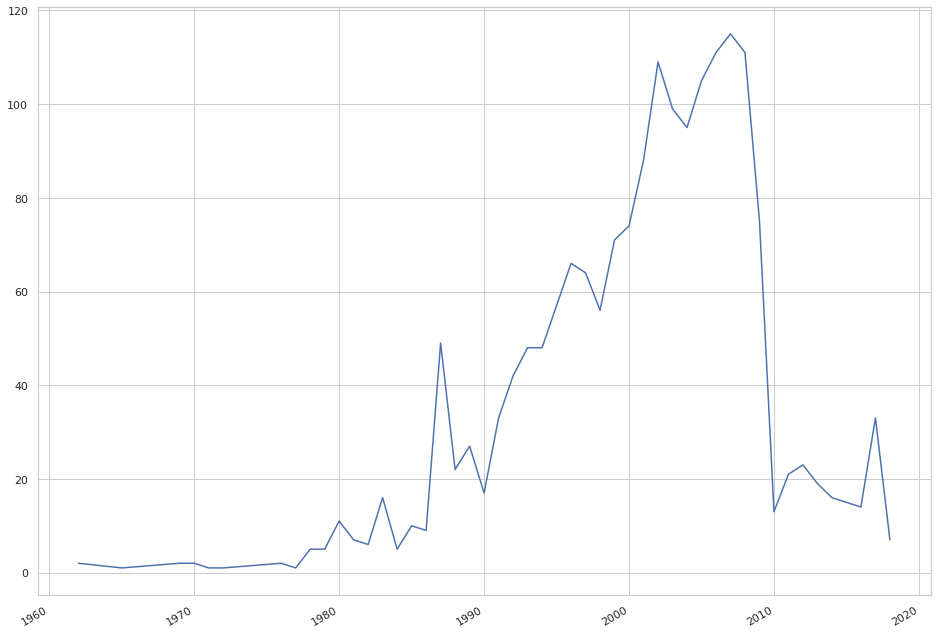

In [ ]:
df_Open_year.plot()

Maximum new store opening can be seen from years **2000 to 2010**

------------------------------------------------------------------

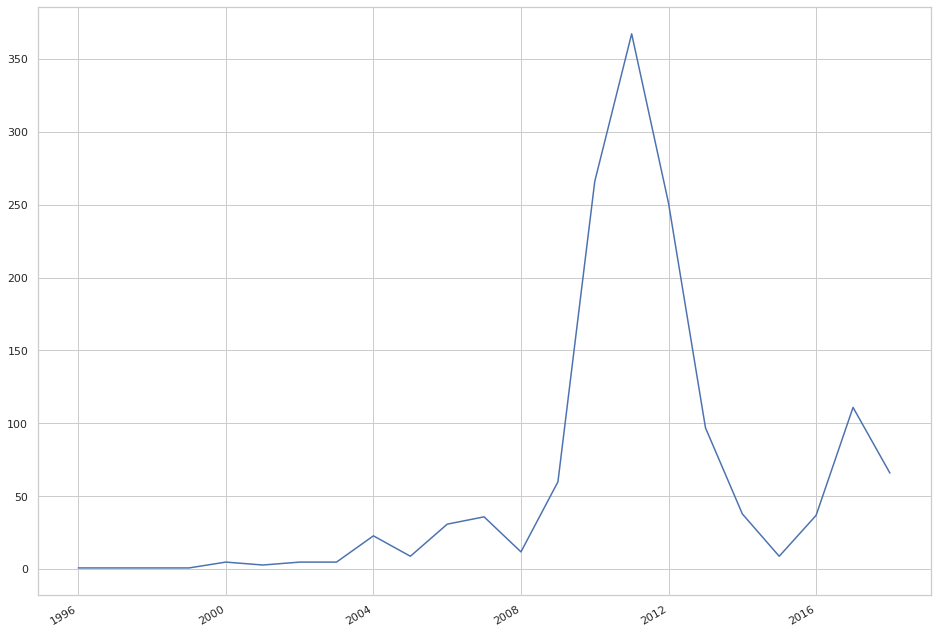

In [ ]:
df_Remodel_year = target.Remodel_year.value_counts()
df_Remodel_year.plot()

Maximum Remodelling of stores can be seen done through year **2010 to 2015**

-----------------------------------------------------------------------------

In [ ]:
target.IsDaylightSavingsTimeRecognized.value_counts()

True     1775
False      54
Name: IsDaylightSavingsTimeRecognized, dtype: int64

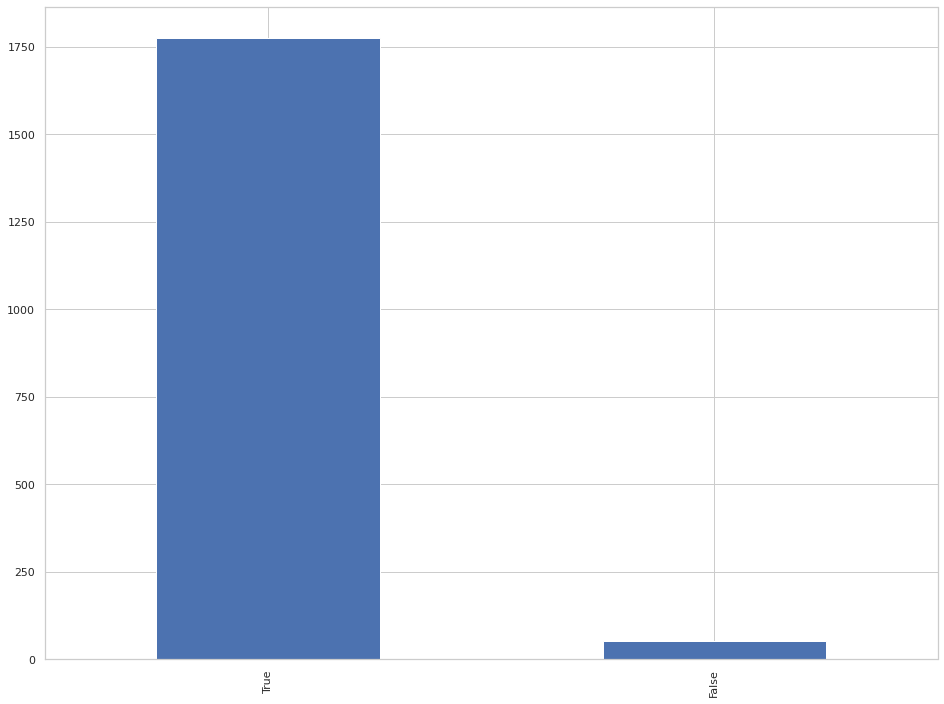

In [ ]:
target.IsDaylightSavingsTimeRecognized.value_counts().plot(kind="bar")

Over **97%** of the stores have recognized Day Light Savings Time

------------------------------------------------------------------------------------------

In [ ]:
target["TimeZone.TimeZoneDescription"].unique()

array(['Central Std Time', 'Eastern Std Time', 'Alaska Std Time',
       'Mountain Std Time', 'Pacific Std Time',
       'Hawaii-Aleutian Std Time'], dtype=object)

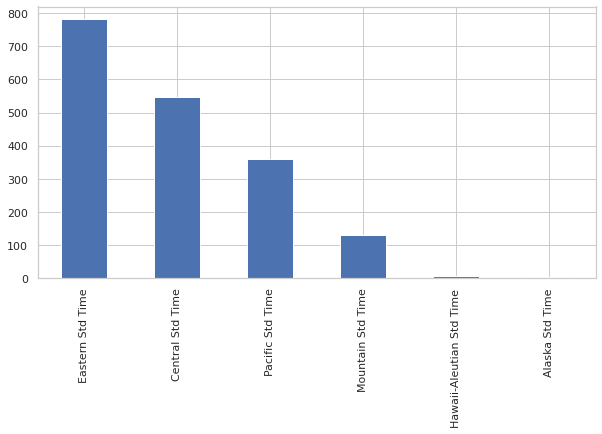

In [ ]:
target["TimeZone.TimeZoneDescription"].value_counts().plot(kind="bar", figsize=(10,5))

**Eastern Standard Time (EST), Central Standard Time (CST), Pacific Standard Time (PST)** have the most number of stores.

---------------------------------------------------------------------------------------------

In [ ]:
target["TimeZone.TimeZoneOffset.OffsetHours"].unique()

array([ -6,  -5,  -9,  -7,  -8, -10])

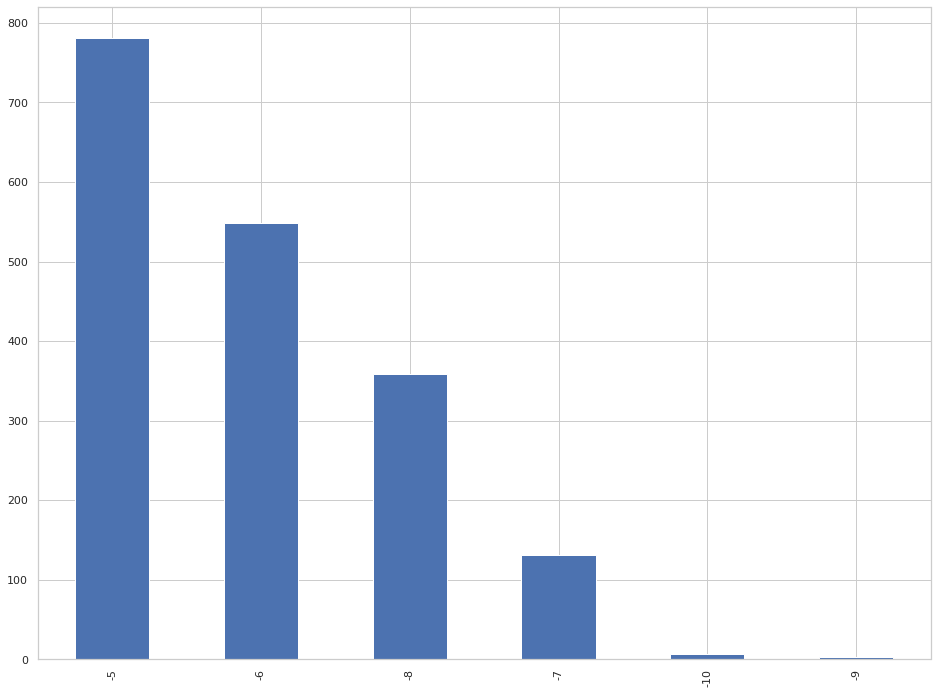

In [ ]:
target["TimeZone.TimeZoneOffset.OffsetHours"].value_counts().plot(kind="bar")

In [ ]:
target.Market.value_counts()

RG2               394
RG4               239
RG3               216
RG1               210
ENE               149
EMW               140
ESE               116
SFL                88
ESF                49
RMP                32
BTC                27
SMN                24
RBO                19
RMI                17
SMA                14
['GTM', 'RMP']      3
GTM                 1
Name: Market, dtype: int64

In [ ]:
print(target.index[target['Market'] == "['GTM', 'RMP']"])

Int64Index([1291, 1295, 1304], dtype='int64')


In [ ]:
target.iloc[1295,14] = 'GTM'
target.iloc[1304,14] = 'GTM'

In [ ]:
target.Market.value_counts()

RG2               394
RG4               239
RG3               216
RG1               210
ENE               149
EMW               140
ESE               116
SFL                88
ESF                49
RMP                32
BTC                27
SMN                24
RBO                19
RMI                17
SMA                14
GTM                 3
['GTM', 'RMP']      1
Name: Market, dtype: int64

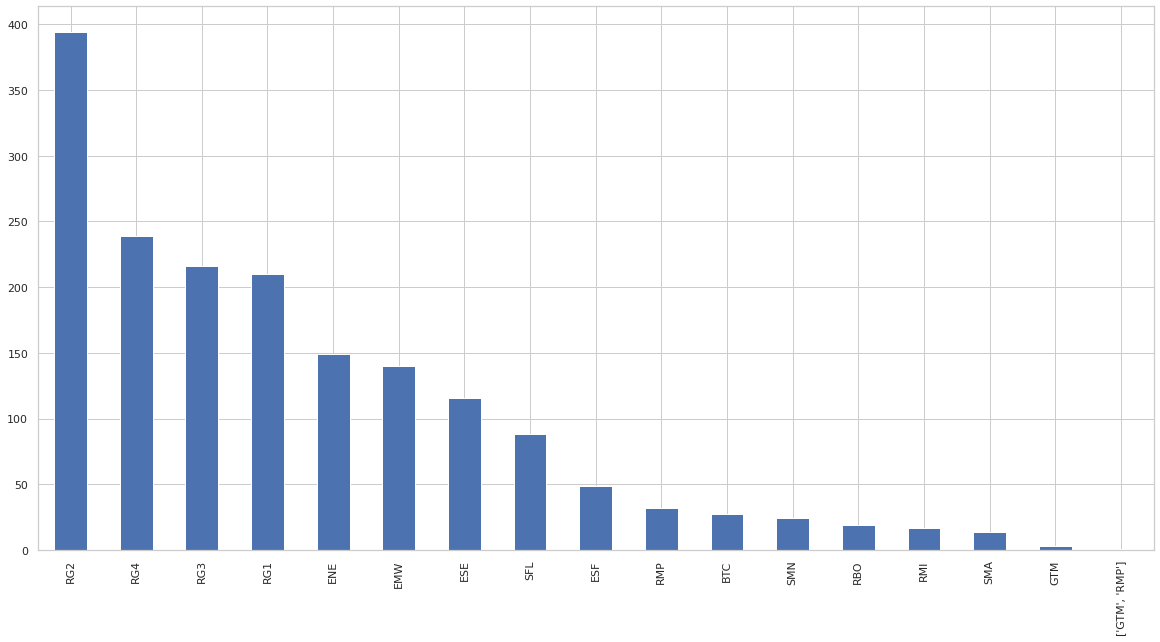

In [ ]:
target.Market.value_counts().plot(kind="bar", figsize=(20,10))

**RG2 Market** has a clear dominance over all other types of markets

---------------------------------------------------------------------------------------

##**Clustering**


**DBSCAN : Density-Based Spatial Clustering of Applications with Noise**  

In [ ]:
target_clusters = target[['Name', 'Address.Latitude', 'Address.Longitude']]
target_clusters = target_clusters.set_index('Name')
target_clusters.head()

,Address.Latitude,Address.Longitude
Name,,
Oxford,33.608825,-85.783182
Opelika,32.618108,-85.410636
Carrollton,33.558920,-85.076473
Newnan,33.392907,-84.758875
Columbus,32.534649,-84.971073


In [ ]:
target_coordinates = target_clusters.values

In [ ]:
target_coordinates

array([[ 33.608825, -85.783182],
       [ 32.618108, -85.410636],
       [ 33.55892 , -85.076473],
       ...,
       [ 29.846426, -97.970298],
       [ 30.011692, -97.864363],
       [ 30.162592, -97.793568]])

####**Case 1**

epsilon = 0.1

algorithm - ball_tree

clusters = 3

In [ ]:
epsilon = 0.1

In [ ]:
db = DBSCAN(eps = epsilon,
             min_samples = 3,
             algorithm = 'ball_tree',
             metric = 'haversine').fit(np.radians(target_coordinates))

cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
print(num_clusters)

3


In [ ]:
target_clusters['DBSCAN_labels'] = cluster_labels
target_clusters.head()

,Address.Latitude,Address.Longitude,DBSCAN_labels
Name,,,
Oxford,33.608825,-85.783182,0
Opelika,32.618108,-85.410636,0
Carrollton,33.558920,-85.076473,0
Newnan,33.392907,-84.758875,0
Columbus,32.534649,-84.971073,0


In [ ]:
target_clusters['DBSCAN_labels'].value_counts()

0    1819
2       7
1       3
Name: DBSCAN_labels, dtype: int64

Visualize Clusters

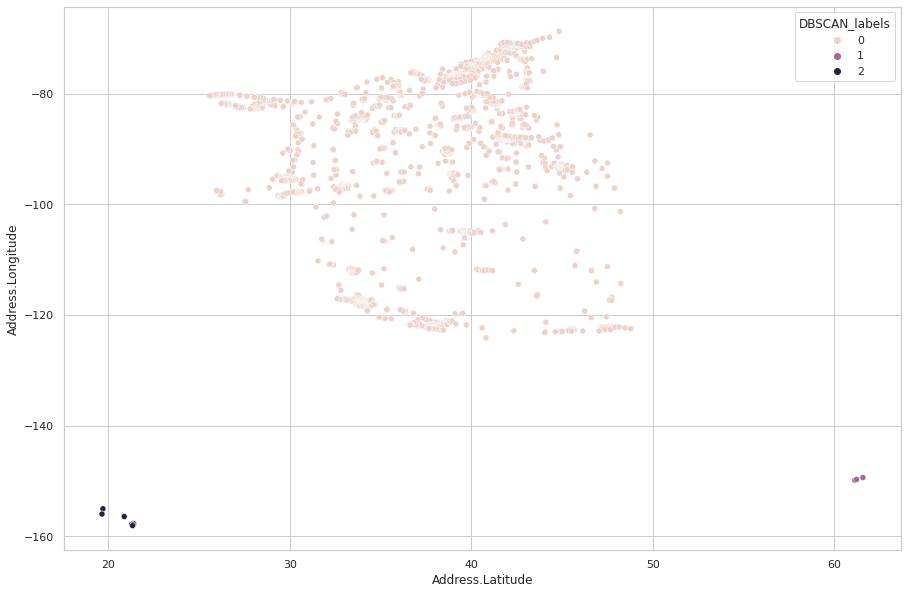

In [ ]:
plt.figure(figsize = (15, 10))
case1 = sns.scatterplot(x="Address.Latitude", 
                     y="Address.Longitude", 
                     hue="DBSCAN_labels",
                     data=target_clusters)

case1

####**Case 2**

epsilon = 0.03

algorithm - ball_tree

clusters = 15

In [ ]:
epsilon = 0.03

db2 = DBSCAN(eps = epsilon,
             min_samples = 3,
             algorithm = 'ball_tree',
             metric = 'haversine').fit(np.radians(target_coordinates))

cluster_labels_2 = db2.labels_
num_clusters_2 = len(set(cluster_labels_2))
print(num_clusters_2)

15


In [ ]:
target_clusters['DBSCAN_labels'] = cluster_labels_2
target_clusters.head()

,Address.Latitude,Address.Longitude,DBSCAN_labels
Name,,,
Oxford,33.608825,-85.783182,0
Opelika,32.618108,-85.410636,0
Carrollton,33.558920,-85.076473,0
Newnan,33.392907,-84.758875,0
Columbus,32.534649,-84.971073,0


In [ ]:
target_clusters['DBSCAN_labels'].value_counts()

 0     1324
 3      289
 9       53
 2       45
 7       44
 6       16
 8       12
-1       11
 10       7
 4        7
 12       5
 5        5
 13       4
 11       4
 1        3
Name: DBSCAN_labels, dtype: int64

Visualize Clusters

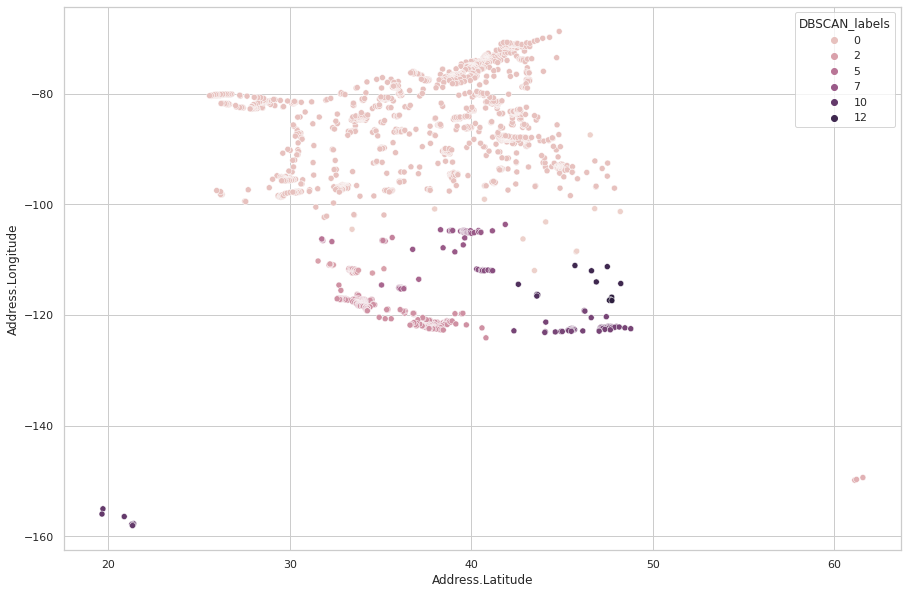

In [ ]:
plt.figure(figsize = (15, 10))
case2 = sns.scatterplot(x="Address.Latitude", 
                     y="Address.Longitude", 
                     hue="DBSCAN_labels",
                     data=target_clusters)

case2

####**Case 3**

epsilon = 0.03

algorithm - kd_tree

clusters = 19

In [ ]:
epsilon = 0.03

db3 = DBSCAN(eps = epsilon,
             min_samples = 3,
             algorithm = 'kd_tree',
             metric = 'euclidean').fit(np.radians(target_coordinates))

cluster_labels_3 = db3.labels_
num_clusters_3 = len(set(cluster_labels_3))
print(num_clusters_3)

19


In [ ]:
target_clusters['DBSCAN_labels'] = cluster_labels_3
target_clusters.head()

,Address.Latitude,Address.Longitude,DBSCAN_labels
Name,,,
Oxford,33.608825,-85.783182,0
Opelika,32.618108,-85.410636,0
Carrollton,33.558920,-85.076473,0
Newnan,33.392907,-84.758875,0
Columbus,32.534649,-84.971073,0


In [ ]:
target_clusters['DBSCAN_labels'].value_counts()

 0     1265
 5      288
 11      47
 3       45
 4       45
 9       44
-1       22
 8       15
 10      12
 13       7
 6        7
 12       5
 7        5
 2        5
 17       4
 16       4
 14       3
 15       3
 1        3
Name: DBSCAN_labels, dtype: int64

Visualize Clusters

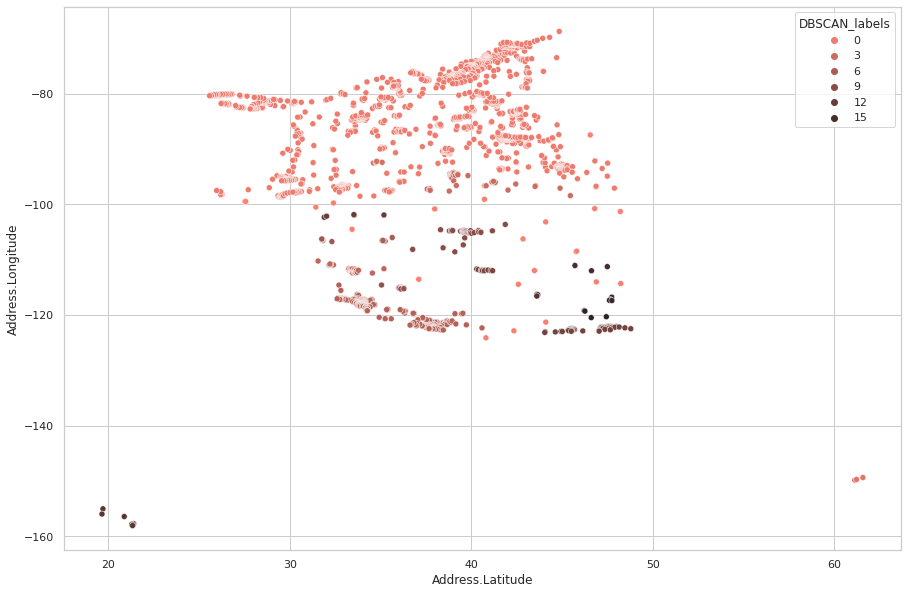

In [ ]:
plt.figure(figsize = (15, 10))
case3 = sns.scatterplot(x="Address.Latitude", 
                     y="Address.Longitude", 
                     hue="DBSCAN_labels",
                     palette = 'dark:salmon_r',
                     data=target_clusters)

case3

####**Case 4**

epsilon = 0.03

algorithm - brute

clusters = 19

In [ ]:
epsilon = 0.03

db4 = DBSCAN(eps = epsilon,
             min_samples = 3,
             algorithm = 'brute',
             metric = 'euclidean').fit(np.radians(target_coordinates))

cluster_labels_4 = db4.labels_
num_clusters_4 = len(set(cluster_labels_4))
print(num_clusters_4)

19


In [ ]:
target_clusters['DBSCAN_labels'] = cluster_labels_4
target_clusters.head()

,Address.Latitude,Address.Longitude,DBSCAN_labels
Name,,,
Oxford,33.608825,-85.783182,0
Opelika,32.618108,-85.410636,0
Carrollton,33.558920,-85.076473,0
Newnan,33.392907,-84.758875,0
Columbus,32.534649,-84.971073,0


In [ ]:
target_clusters['DBSCAN_labels'].value_counts()

 0     1265
 5      288
 11      47
 3       45
 4       45
 9       44
-1       22
 8       15
 10      12
 13       7
 6        7
 12       5
 7        5
 2        5
 17       4
 16       4
 14       3
 15       3
 1        3
Name: DBSCAN_labels, dtype: int64

Visualize Clusters

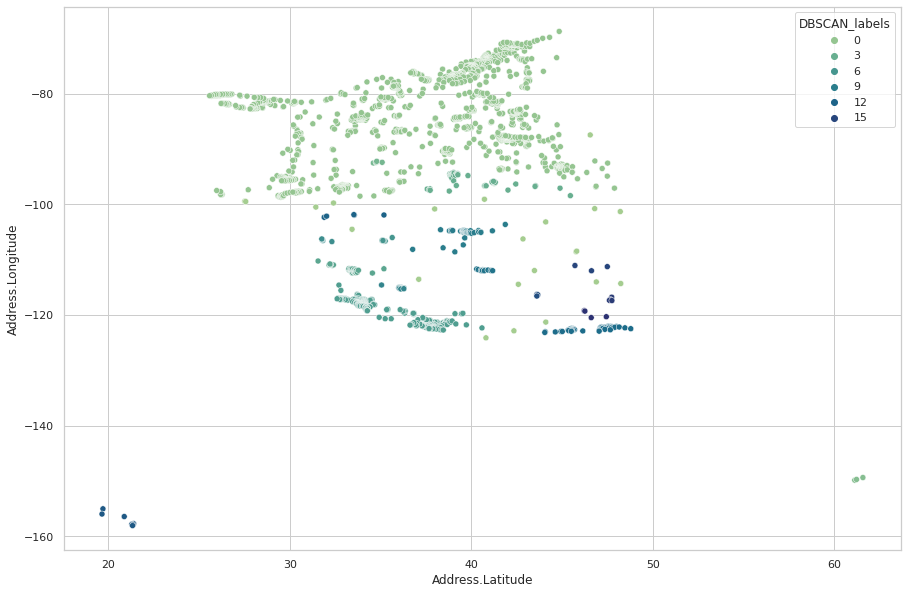

In [ ]:
plt.figure(figsize = (15, 10))
case4 = sns.scatterplot(x="Address.Latitude", 
                     y="Address.Longitude", 
                     hue="DBSCAN_labels",
                     palette = 'crest',
                     data=target_clusters)

case4

##**Clustering Summary**

-----------------------------------------------------

>Case | Epsilon | Algorithm | Number of Clusters
>--- | --- | --- | ---
>Case 1 | 0.1 | ball_tree | 3
>Case 2 | 0.03 | ball_tree | 15
>Case 3 | 0.03 | kd_tree | 19
>Case 4 | 0.03 | brute | 19

##**Saving Datasets**

In [ ]:
target.to_csv("target_dataset.csv")

In [ ]:
target_clusters.head()

,Address.Latitude,Address.Longitude,DBSCAN_labels
Name,,,
Oxford,33.608825,-85.783182,0
Opelika,32.618108,-85.410636,0
Carrollton,33.558920,-85.076473,0
Newnan,33.392907,-84.758875,0
Columbus,32.534649,-84.971073,0


In [ ]:
target_clusters.drop(['DBSCAN_labels'], axis = 1, inplace=True)
target_clusters.head() 

,Address.Latitude,Address.Longitude
Name,,
Oxford,33.608825,-85.783182
Opelika,32.618108,-85.410636
Carrollton,33.558920,-85.076473
Newnan,33.392907,-84.758875
Columbus,32.534649,-84.971073


In [ ]:
target_clusters['DBSCAN_labels_case1'] = cluster_labels
target_clusters['DBSCAN_labels_case2'] = cluster_labels_2
target_clusters['DBSCAN_labels_case3'] = cluster_labels_3
target_clusters['DBSCAN_labels_case4'] = cluster_labels_4

target_clusters.head(3)


,Address.Latitude,Address.Longitude,DBSCAN_labels_case1,DBSCAN_labels_case2,DBSCAN_labels_case3,DBSCAN_labels_case4
Name,,,,,,
Oxford,33.608825,-85.783182,0,0,0,0
Opelika,32.618108,-85.410636,0,0,0,0
Carrollton,33.558920,-85.076473,0,0,0,0


In [ ]:
target_clusters.to_csv("target_clusters.csv")